In [1]:
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [2]:

base_url = "http://fits.geonet.org.nz/"
endpoint = "observation"

url = base_url + endpoint
parameters ={"typeID": "e", "siteID": "GISB"}

response_e = requests.get(url, params=parameters)
parameters["typeID"] = "n"
response_n = requests.get(url, params=parameters)
parameters["typeID"] = "u"
response_u = requests.get(url, params=parameters)

def GNSS_dataframe(data):
    """
    This function turns the string of GNSS data received by requests.get
    into a data frame with GNSS data correctly formatted.
    """
    data = data.split("\n") # splits data on the new line symbol
    for i in range(0, len(data)):
        data[i]= data[i].split(",")# splits data ponits on the , symbol
    for i in range(1, (len(data)-1)):
        data[i][0] = datetime.datetime.strptime(data[i][0], '%Y-%m-%dT%H:%M:%S.%fZ') #make 1st value into a datetime object
        data[i][1] = float(data[i][1]) #makes 2nd value into a decimal number
        data[i][2] = float(data[i][2]) #makes 3rd value into a decimal number
    df = pd.DataFrame(data[1:-1],index = range(1, (len(data)-1)), columns=data[0]) #make the list into a data frame
    return df

df_e = GNSS_dataframe(response_e.content.decode("utf-8"))
df_u = GNSS_dataframe(response_u.content.decode("utf-8"))
df_n = GNSS_dataframe(response_n.content.decode("utf-8"))

                              
df_e = df_e.set_index('date-time')
df_u = df_u.set_index('date-time')
df_n = df_n.set_index('date-time')

df_e.columns = ['e', 'error']
df_u.columns = ['u', 'error']
df_n.columns = ['n', 'error']


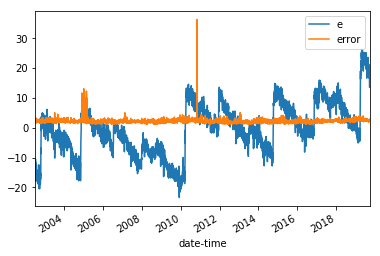

In [7]:
df_e.plot()